# Instruction to lab work # 1

> Student name    - Dmytro

> Student surname - Honcharuk

> Group           - KS-32


# Task description

### Overall work description

The work will contain 2 main parts:
1. In the first part you'll build intuition behind using various regression models using only artificially generated (with noise & outliers) data. I've generated 2 options with `f(x) = A*sin(x) + B` and `f(x) = a*x + b` functions. (you free to add more complex functions (even more dimensional).
2. In the second part you'll solve regression problem on the real data.

Do NOT forget to change your `STUDENT_NO` -- this variable defines random state (it just makes experimental data for every one slighty different).

Do NOT forget to set you contact data in the top cell.


### I. Experiments on artificially generated data:

1. Manually tune linear model by changing `a` and `b` weights of it. Observe position of the line and values of loss function.
2. **More advanced task** (+2 point): modify my code to work with more complex functions as regression models (linear, polynomial, sin, cos, and their combination). Feel free to use as complex function as you could found. Generate some random non-linear data and use your function to manually adjust its weights.
3. Play with default regression methods from `sklearn` library on non-linear data. Search, llm-prompt information on each model to understand how to make the model fit the data without overfitting.


### II. Experiments on real data. (you can keep it in this notebook or in a separate one).

1. Choose any DataSet you like for you experiments (if you've chosen the same, consider that work must differ, otherwise both students will get 0 points for work).
2. Choose the top-3 methods (from `sklearn` library, or you can use other libraries (like `xgboost`) from the previous part.
2. Solve the regression problem in the same manner, as you used for.
    1. Load the data
    2. Do data visualization: correlation, feature distribution, etc.
    3. Do data analysis
    4. Do data correction
    5. Prepare data on usage with ML model: train, validation if necessary, test split; data convertion (to fix distribution or change data type to numeric); remove outliers.
    6. Tune hyperparameters of your model to get the best one.
    7. Train & test the final version of the model. Do conclusion.
3. Your main goal is tune hyperparameters of the chosen models.
4. Examples and template you can find in `ML_basic_course/lab_works/lab2/lab_2_example_plus_task.ipynb`. Or in [my GitHub repo's folder](https://github.com/VolDonets/ML_basics_course/tree/master/lab_works/lab_2)
5. Use that notebook as template, but remember your main goal is to tune hyperparameters of chosen models.

### III. Important.

1. Students, who solved the problem in a single code cell will get 0 points for your work. It's hard to work with your messy code, we have limited time. Use this notebook as your template, create as many cells as you need. Also you can conduct experiments in .py files but in that case prepare normal report.
2. Experiments means you have multiple cells with EXPERIMENTS and your CONCLUSION after that.
3. You can have multiple notebooks if you need, but name it correctly and add `ReadMe.md`.


## Proposition of the real data for experiments

7. [California House Price](https://www.kaggle.com/datasets/shibumohapatra/house-price)


In [7]:
STUDENT_NO = 7

# Import dependencies

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Helping functions

KNeighborsRegressor Metrics: {'MAE': 8.062025579219245, 'MSE': 305.41013209898944, 'RMSE': np.float64(17.47598729969181), 'R2': 0.24155811176515718}


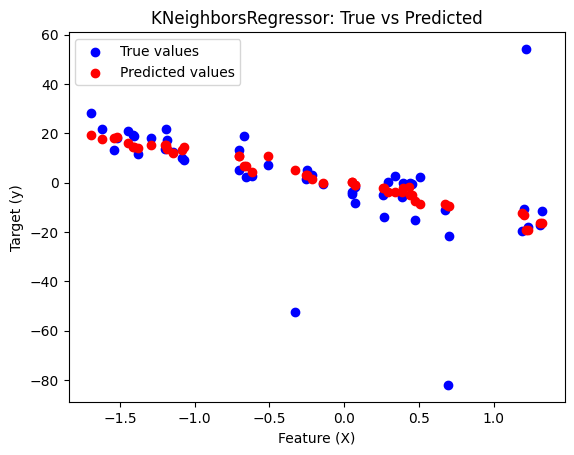

In [24]:
def generate_regression_data(n_samples=250, n_features=1, mode='linear', noise=5.0, n_outliers=7, random_seed=23):
    np.random.seed(random_seed)
    X = np.random.rand(n_samples, n_features) * 10 - 5
    true_intercept = np.random.uniform(-3, 3)
    true_weights = np.random.uniform(-5, 5, size=n_features)

    if mode == 'linear':
        y_true = np.dot(X, true_weights) + true_intercept
    elif mode == 'nonlinear':
        y_true = true_weights[0] * 20 * np.sin(X[:, 0]*1.5) + true_intercept
    y = y_true + np.random.normal(scale=noise, size=n_samples)
    if n_outliers > 0:
        outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
        outlier_offset = (np.random.rand(n_outliers) - 0.5) * 30 * (noise + 1)
        y[outlier_indices] += outlier_offset
    return X, y

X, y = generate_regression_data(n_samples=250, mode='linear', noise=5.0, n_outliers=7, random_seed=23)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=23)

def evaluate_model(y_true, y_pred):
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }
    return metrics

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
metrics_knn = evaluate_model(y_test, y_pred_knn)
print("KNeighborsRegressor Metrics:", metrics_knn)

plt.scatter(X_test, y_test, color='blue', label='True values')
plt.scatter(X_test, y_pred_knn, color='red', label='Predicted values')
plt.title("KNeighborsRegressor: True vs Predicted")
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


# Section 1: experiments on artificial data

**More advanced task** (+2 point): modify my code to work with more complex functions for regression (linear, polynomial, sin, cos, and their combination). Feel free to use as complex function as you could found.

## 1.1. Tuning manual Linear Regression 

Just change coefficients of the Linear model and observe changes in loss function

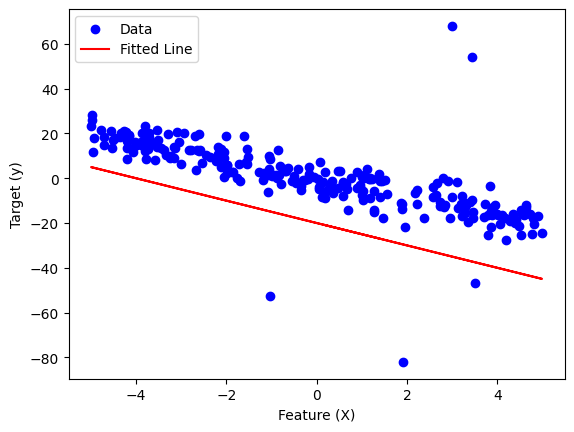

Linear Regression Metrics: {'MAE': 20.677396803477468, 'MSE': 510.5378127088126, 'RMSE': np.float64(22.595083817255748), 'R2': -1.1969330114757115}


In [25]:
def generate_regression_data(n_samples=250, n_features=1, mode='linear', noise=5.0, n_outliers=7, random_seed=23):
    np.random.seed(random_seed)
    X = np.random.rand(n_samples, n_features) * 10 - 5
    true_intercept = np.random.uniform(-3, 3)
    true_weights = np.random.uniform(-5, 5, size=n_features)

    if mode == 'linear':
        y_true = np.dot(X, true_weights) + true_intercept
    elif mode == 'nonlinear':
        y_true = true_weights[0] * 20 * np.sin(X[:, 0]*1.5) + true_intercept
    y = y_true + np.random.normal(scale=noise, size=n_samples)
    if n_outliers > 0:
        outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
        outlier_offset = (np.random.rand(n_outliers) - 0.5) * 30 * (noise + 1)
        y[outlier_indices] += outlier_offset
    return X, y

X_lin, y_lin = generate_regression_data(n_samples=250, mode='linear', noise=5.0, n_outliers=7, random_seed=23)

lin_model_weights = [-5, -20]

def evaluate_model(y_true, y_pred):
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }
    return metrics

plt.scatter(X_lin, y_lin, color='blue', label='Data')
plt.plot(X_lin, lin_model_weights[0] * X_lin + lin_model_weights[1], color='red', label='Fitted Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()
y_pred_lin = lin_model_weights[0] * X_lin + lin_model_weights[1]
metrics_lin = evaluate_model(y_lin, y_pred_lin)
print("Linear Regression Metrics:", metrics_lin)

## 1.2. Tuning Linear Regression on non-linear data

Just change coefficients of the Linear model and observe changes in loss function

Linear Model on Nonlinear Data: {'MAE': 28.13501252225209, 'MSE': 1278.6172331995497, 'RMSE': np.float64(35.757757664590066), 'R2': -1.0036071035478193}


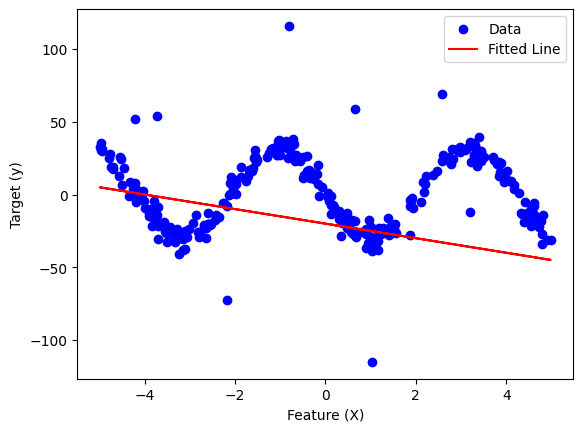

In [26]:
X_nonlin, y_nonlin = generate_regression_data(n_samples=300, mode='nonlinear', noise=5.0, n_outliers=10, random_seed=23)

y_pred_nonlin = lin_model_weights[0] * X_nonlin + lin_model_weights[1]
metrics_nonlin = evaluate_model(y_nonlin, y_pred_nonlin)
print("Linear Model on Nonlinear Data:", metrics_nonlin)

plt.scatter(X_nonlin, y_nonlin, color='blue', label='Data')
plt.plot(X_nonlin, y_pred_nonlin, color='red', label='Fitted Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


## 1.3. Configuring various linear models from sklearn library

Try to configure hyperparameters of various linear regression models from sklearn

In [27]:
from sklearn.linear_model import LinearRegression, HuberRegressor, PoissonRegressor

### 1.3.1. Playing with `HuberRegressor`

In [28]:
hub_model = HuberRegressor(epsilon=1.35, max_iter=100, alpha=0.0001)
hub_model.fit(X_lin, y_lin)

y_pred_hub = hub_model.predict(X_lin)
metrics_hub = evaluate_model(y_lin, y_pred_hub)
print("Huber Regression Metrics:", metrics_hub)

Huber Regression Metrics: {'MAE': 4.927308447424815, 'MSE': 105.3897495122906, 'RMSE': np.float64(10.265950979441243), 'R2': 0.5464895762642286}


### 1.3.2. Playing with `PoissonRegressor`

In [29]:
pois_model = PoissonRegressor(alpha=1.0, fit_intercept=True, solver="lbfgs", max_iter=100)
pois_model.fit(X_lin, y_lin - np.min(y_lin))

y_pred_pois = pois_model.predict(X_lin)
metrics_pois = evaluate_model(y_lin - np.min(y_lin), y_pred_pois)
print("Poisson Regression Metrics:", metrics_pois)

Poisson Regression Metrics: {'MAE': 4.917390508094106, 'MSE': 104.63031244477216, 'RMSE': np.float64(10.228895954342882), 'R2': 0.5497575660629022}


## 1.4. Configure non-linear models from sklearn library

In [30]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR

### 1.4.1. Playing with `KNeighborsRegressor`

KNeighborsRegressor Metrics: {'MAE': 8.062025579219245, 'MSE': 305.41013209898944, 'RMSE': np.float64(17.47598729969181), 'R2': 0.24155811176515718}


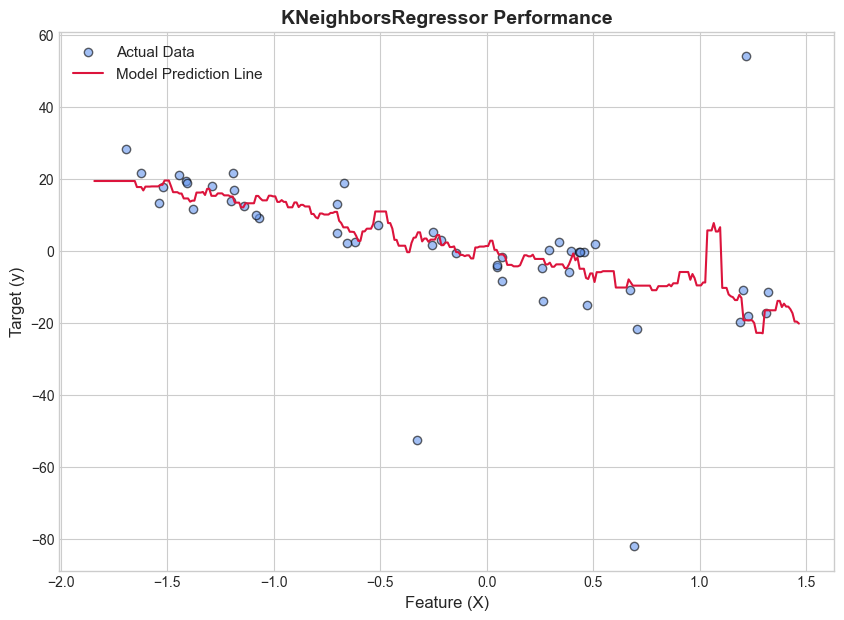

In [31]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
metrics_knn = evaluate_model(y_test, y_pred_knn)
print("KNeighborsRegressor Metrics:", metrics_knn)

plot_sklearn_regression(knn_model, X_test, y_test, title="KNeighborsRegressor Performance")


### 1.4.2. Playing with `RadiusNeighborsRegressor`

RadiusNeighborsRegressor Metrics: {'MAE': 8.569549738348154, 'MSE': 296.37207133512936, 'RMSE': np.float64(17.21546024174577), 'R2': 0.2640028283978767}


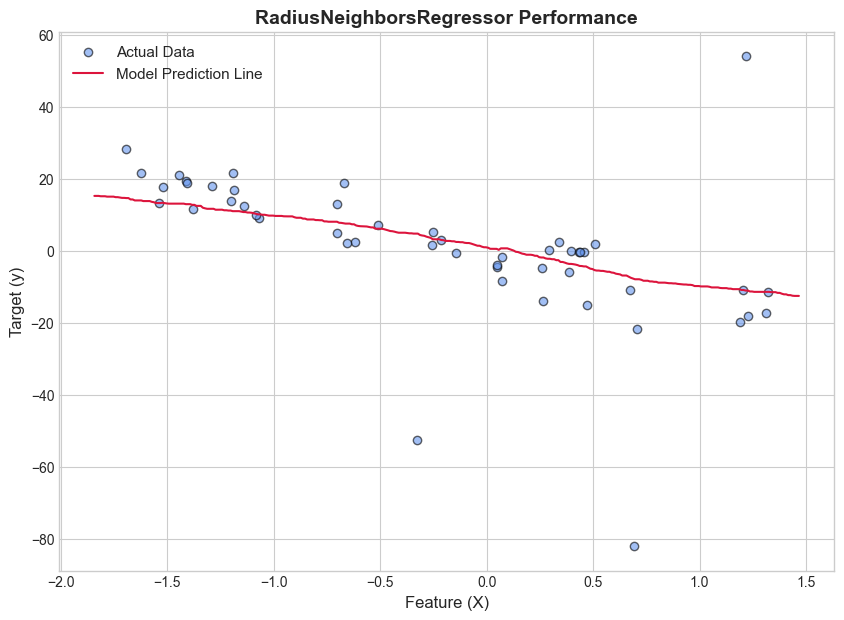

In [32]:
radius_model = RadiusNeighborsRegressor(radius=1.0)
radius_model.fit(X_train, y_train)

y_pred_radius = radius_model.predict(X_test)
metrics_radius = evaluate_model(y_test, y_pred_radius)
print("RadiusNeighborsRegressor Metrics:", metrics_radius)

plot_sklearn_regression(radius_model, X_test, y_test, title="RadiusNeighborsRegressor Performance")


### 1.4.3. Playing with `DecisionTreeRegressor`

DecisionTreeRegressor Metrics: {'MAE': 8.287106342743018, 'MSE': 287.2633138903404, 'RMSE': np.float64(16.948844028143643), 'R2': 0.2866231100120432}


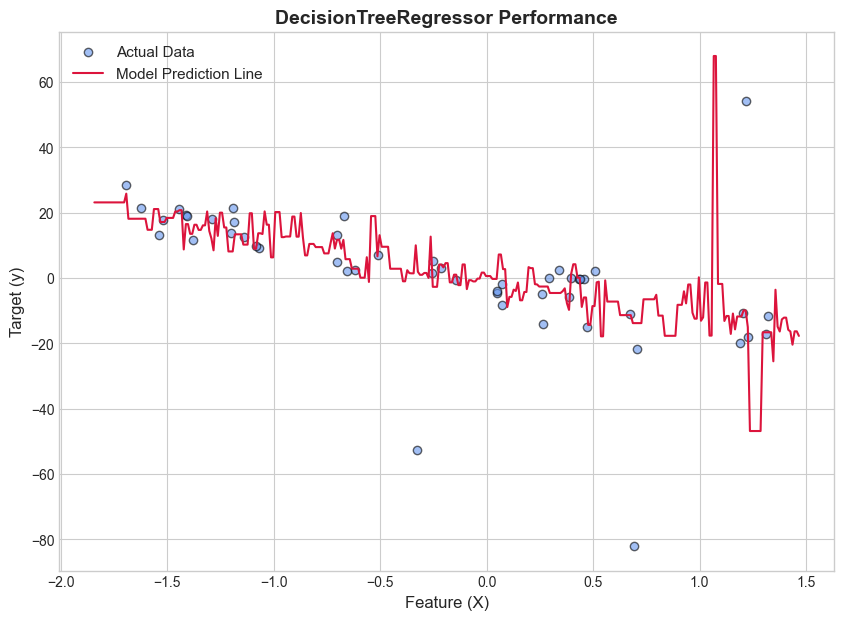

In [33]:
dt_model = DecisionTreeRegressor(random_state=23)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
metrics_dt = evaluate_model(y_test, y_pred_dt)
print("DecisionTreeRegressor Metrics:", metrics_dt)

plot_sklearn_regression(dt_model, X_test, y_test, title="DecisionTreeRegressor Performance")

### 1.4.4. Playing with `AdaBoostRegressor`

AdaBoostRegressor Metrics: {'MAE': 8.436673946470178, 'MSE': 298.75320659734496, 'RMSE': np.float64(17.284478777138318), 'R2': 0.2580896233839972}


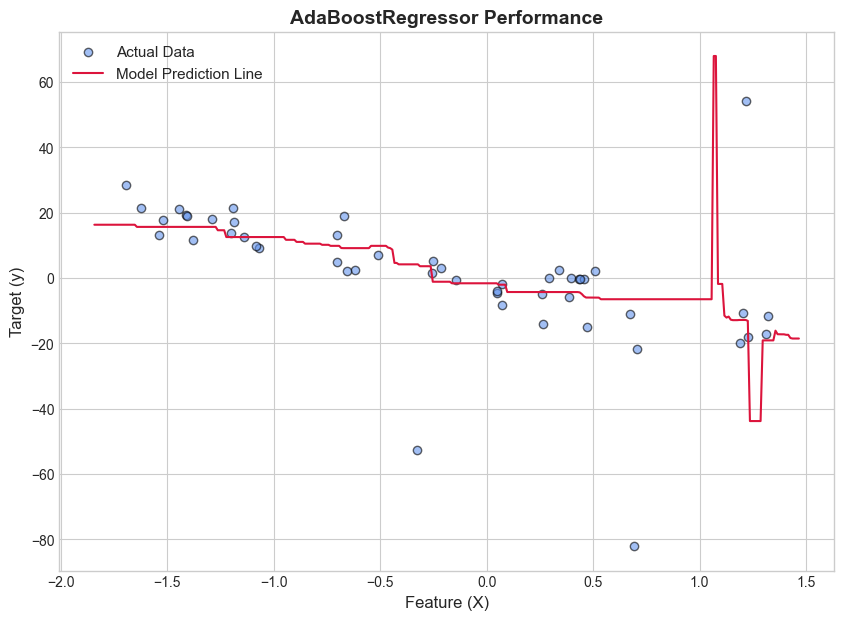

In [40]:
dt_model = DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(n_estimators=50, random_state=23)
ada_model.estimator = dt_model
ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_test)
metrics_ada = evaluate_model(y_test, y_pred_ada)
print("AdaBoostRegressor Metrics:", metrics_ada)

plot_sklearn_regression(ada_model, X_test, y_test, title="AdaBoostRegressor Performance")

### 1.4.5. Playing with `RandomForestRegressor`

RandomForestRegressor Metrics: {'MAE': 8.056608407296778, 'MSE': 292.2921026433744, 'RMSE': np.float64(17.096552361320523), 'R2': 0.2741348405130173}


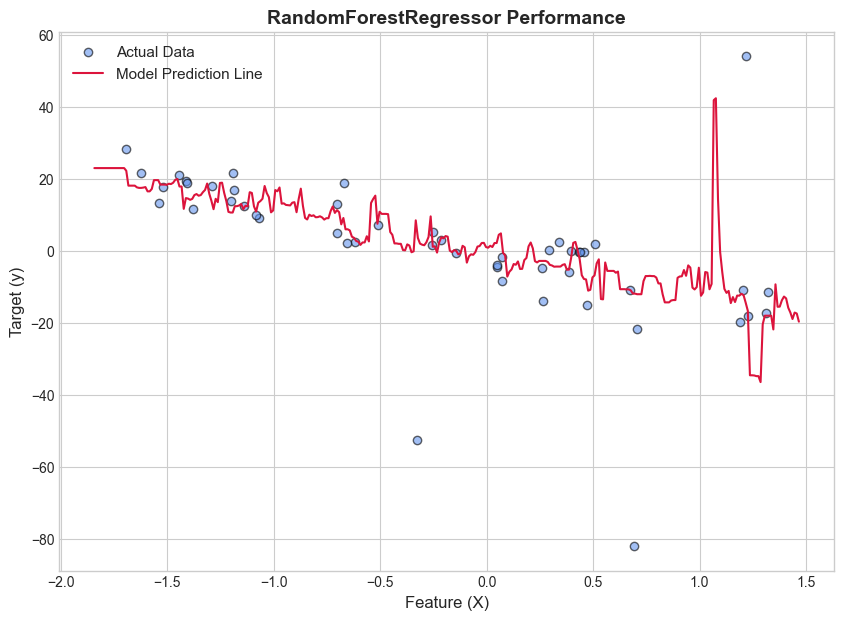

In [41]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=23)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
metrics_rf = evaluate_model(y_test, y_pred_rf)
print("RandomForestRegressor Metrics:", metrics_rf)

plot_sklearn_regression(rf_model, X_test, y_test, title="RandomForestRegressor Performance")

### 1.4.6. Playing with `GradientBoostingRegressor`

GradientBoostingRegressor Metrics: {'MAE': 7.961569086296311, 'MSE': 286.3919338745359, 'RMSE': np.float64(16.92311832596274), 'R2': 0.2887870562439995}


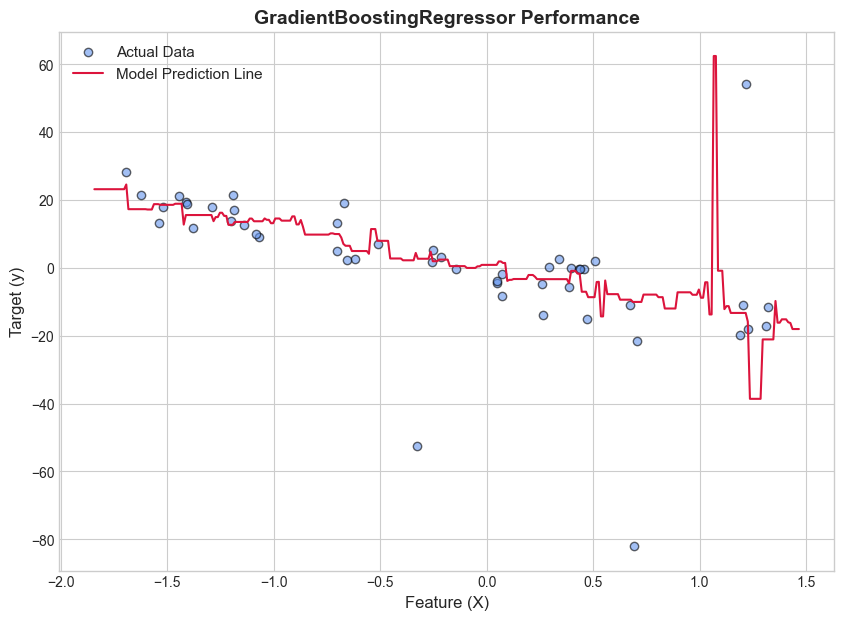

In [42]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=23)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
metrics_gb = evaluate_model(y_test, y_pred_gb)
print("GradientBoostingRegressor Metrics:", metrics_gb)

plot_sklearn_regression(gb_model, X_test, y_test, title="GradientBoostingRegressor Performance")

### 1.4.7. Playing with `VotingRegressor`

VotingRegressor Metrics: {'MAE': 7.98294591538104, 'MSE': 291.092000945708, 'RMSE': np.float64(17.06141849160579), 'R2': 0.27711511949523837}


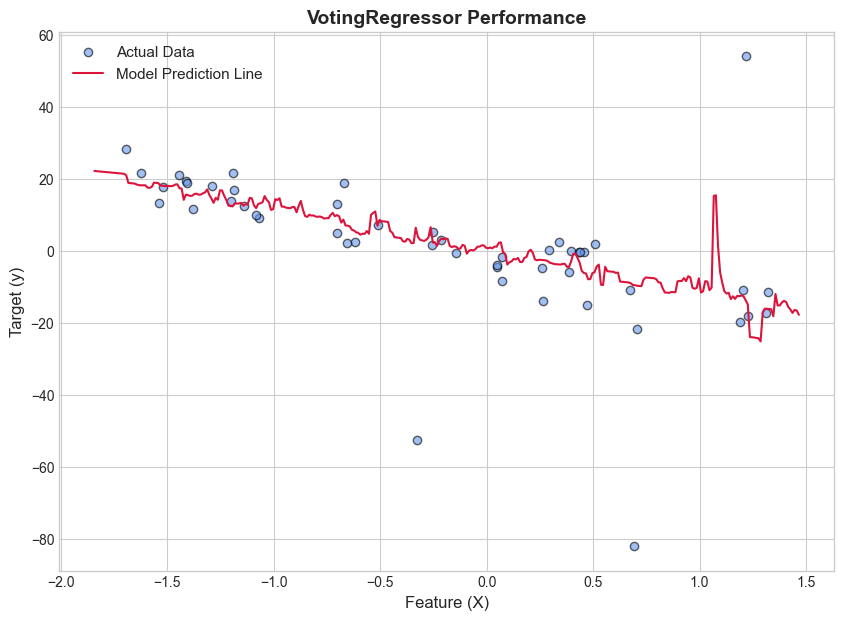

In [43]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=23)
voting_model = VotingRegressor([('lr', lr_model), ('rf', rf_model)])

voting_model.fit(X_train, y_train)

y_pred_voting = voting_model.predict(X_test)
metrics_voting = evaluate_model(y_test, y_pred_voting)
print("VotingRegressor Metrics:", metrics_voting)

plot_sklearn_regression(voting_model, X_test, y_test, title="VotingRegressor Performance")

### 1.4.8. Playing with `SVR (Support Vector Regression)`

SVR Metrics: {'MAE': 8.014053219583905, 'MSE': 290.57069625323476, 'RMSE': np.float64(17.04613434926625), 'R2': 0.2784097042969532}


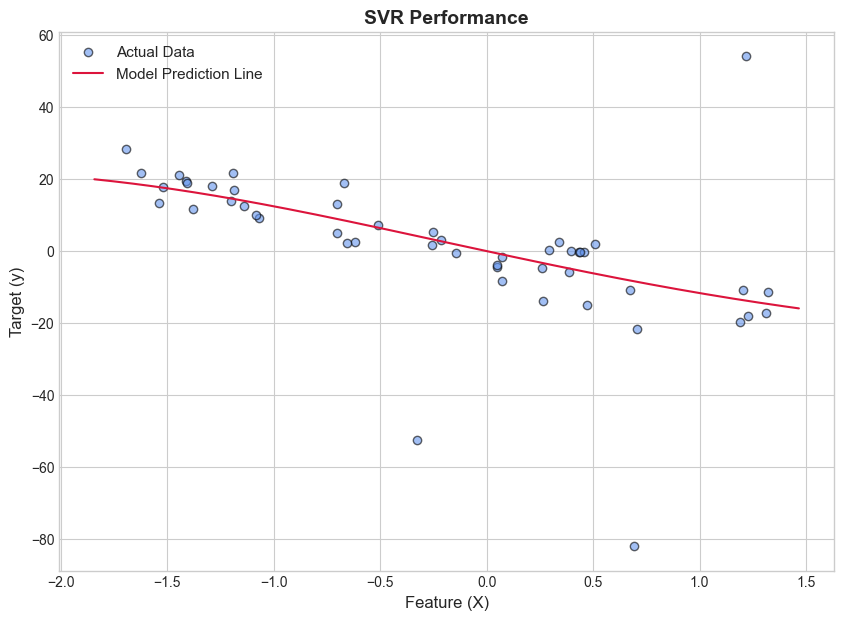

In [44]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)
metrics_svr = evaluate_model(y_test, y_pred_svr)
print("SVR Metrics:", metrics_svr)

plot_sklearn_regression(svr_model, X_test, y_test, title="SVR Performance")

# Section 2: experiments on real data

1. Choose any DataSet you like for you experiments (if you've chosen the same, consider that work must differ, otherwise both students will get 0 points for work).
2. Choose the top-3 methods (from `sklearn` library, or you can use other libraries (like `xgboost`) from the previous part.
2. Solve the regression problem in the same manner, as you used for.
    1. Load the data
    2. Do data visualization: correlation, feature distribution, etc.
    3. Do data analysis
    4. Do data correction
    5. Prepare data on usage with ML model: train, validation if necessary, test split; data convertion (to fix distribution or change data type to numeric); remove outliers.
    6. Tune hyperparameters of your model to get the best one.
    7. Train & test the final version of the model. Do conclusion.
3. Your main goal is tune hyperparameters of the chosen models.
4. Examples and template you can find in `ML_basic_course/lab_works/lab2/lab_2_example_plus_task.ipynb`. Or in [my GitHub repo's folder](https://github.com/VolDonets/ML_basics_course/tree/master/lab_works/lab_2)
5. Use that notebook as template, but remember your main goal is to tune hyperparameters of chosen models.

In [51]:
import pandas as pd
df = pd.read_csv("1553768847-housing.csv")
print(df.head())
numeric_df = df.select_dtypes(include=['float64', 'int64'])

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


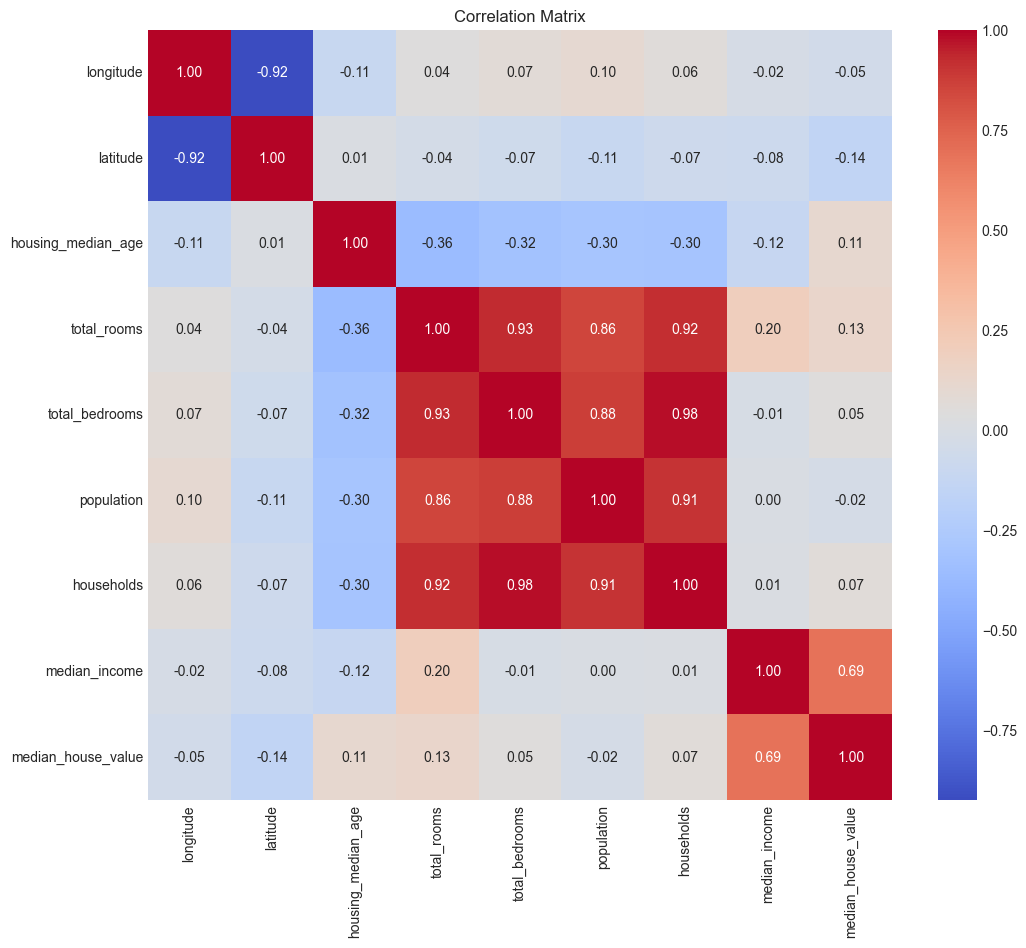

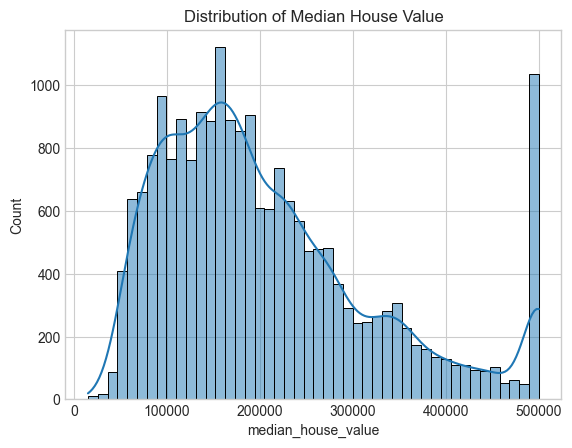

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
sns.histplot(df['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.show()

In [53]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df = pd.get_dummies(df, drop_first=True)

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=23)

Linear Regression

Linear Regression: {'MAE': 50309.64002280546, 'MSE': 4624873387.799724, 'RMSE': np.float64(68006.42166589655), 'R2': 0.6586265429816112}


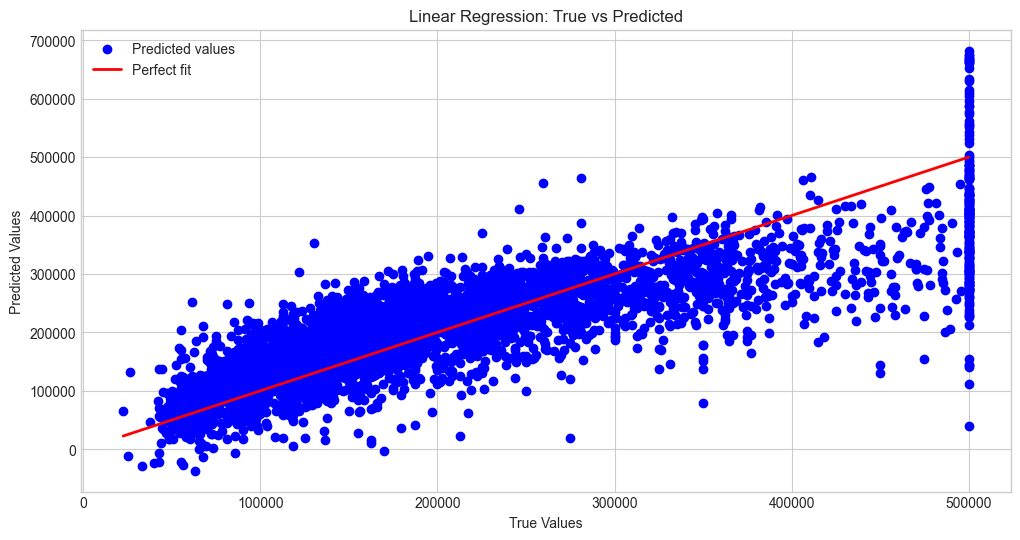

In [57]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
metrics_lr = evaluate_model(y_test, y_pred_lr)
print('Linear Regression:', metrics_lr)

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Predicted values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect fit')
plt.title('Linear Regression: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Random Forest

Random Forest: {'MAE': 31879.907909399222, 'MSE': 2346054291.8254986, 'RMSE': np.float64(48436.08460461579), 'R2': 0.8268318726160164}


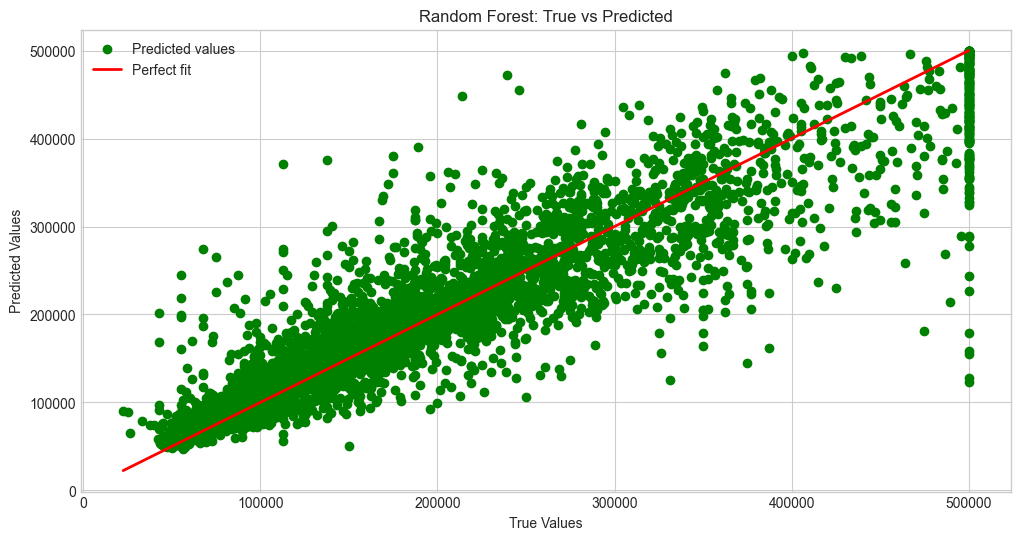

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=23)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
metrics_rf = evaluate_model(y_test, y_pred_rf)
print('Random Forest:', metrics_rf)

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predicted values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect fit')
plt.title('Random Forest: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

XGBoost

XGBoost: {'MAE': 32117.015625, 'MSE': 2252605184.0, 'RMSE': np.float64(47461.61800866043), 'R2': 0.83372962474823}


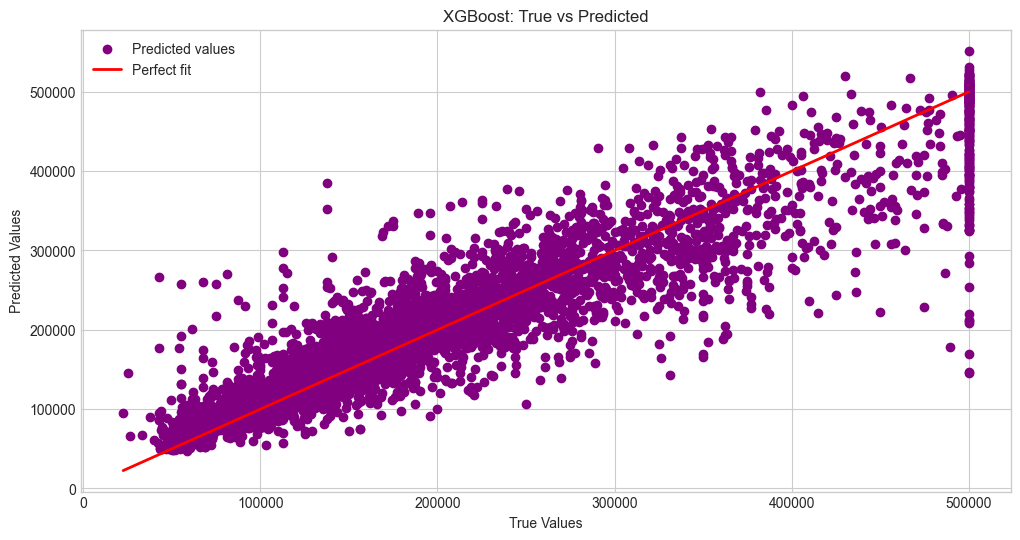

In [61]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=23)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
metrics_xgb = evaluate_model(y_test, y_pred_xgb)
print('XGBoost:', metrics_xgb)

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_xgb, color='purple', label='Predicted values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect fit')
plt.title('XGBoost: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Гистограмма ошибок

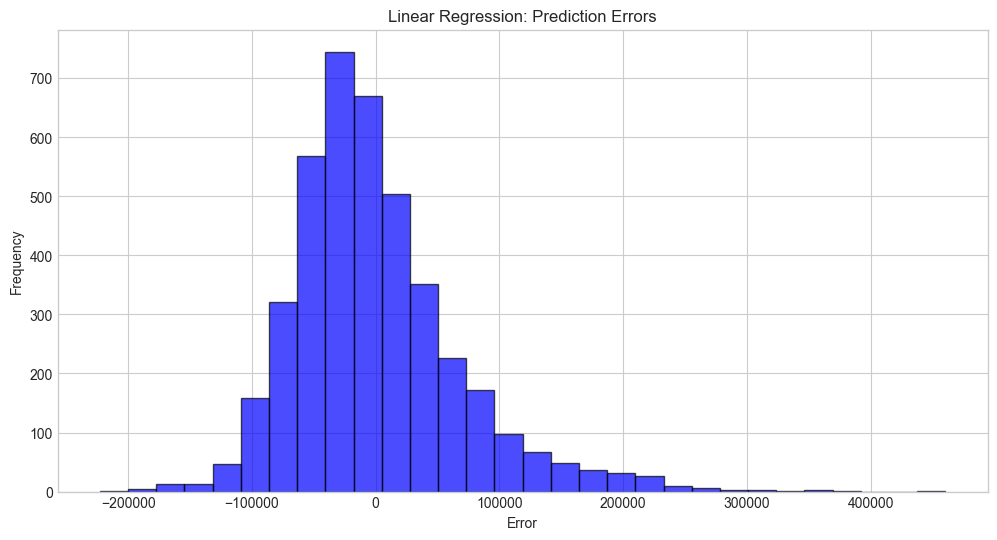

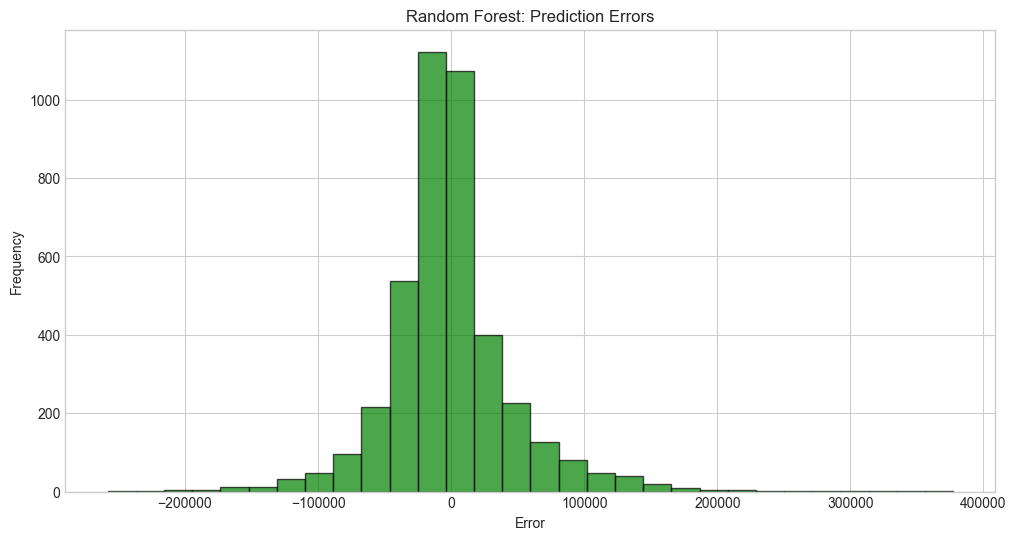

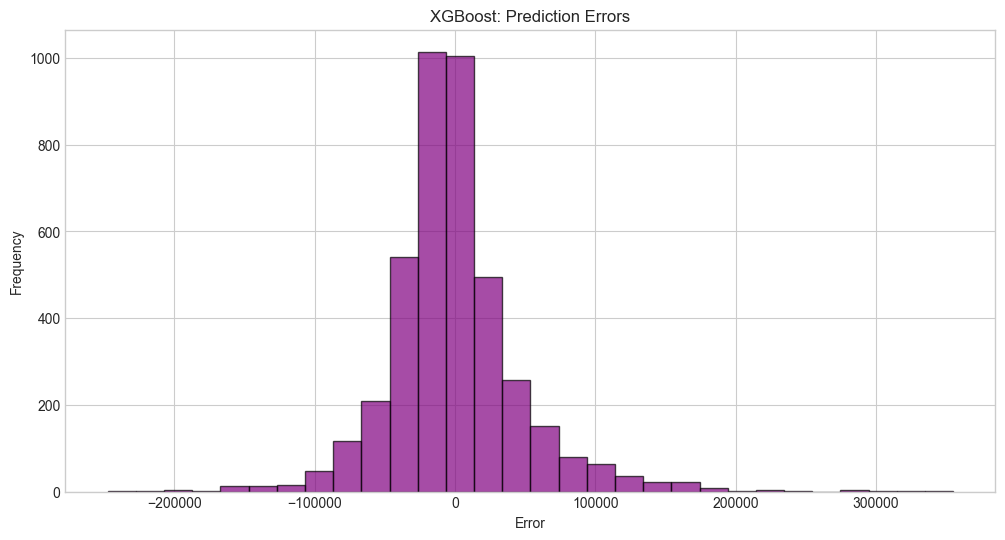

In [63]:
#Linear Regression
errors_lr = y_test - y_pred_lr
plt.figure(figsize=(12, 6))
plt.hist(errors_lr, bins=30, edgecolor='black', color='blue', alpha=0.7)
plt.title('Linear Regression: Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
#Random Forest
errors_rf = y_test - y_pred_rf
plt.figure(figsize=(12, 6))
plt.hist(errors_rf, bins=30, edgecolor='black', color='green', alpha=0.7)
plt.title('Random Forest: Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()
#XGBoost
errors_xgb = y_test - y_pred_xgb
plt.figure(figsize=(12, 6))
plt.hist(errors_xgb, bins=30, edgecolor='black', color='purple', alpha=0.7)
plt.title('XGBoost: Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


Оценка моделей

In [62]:
def evaluate_model(y_true, y_pred):
    metrics = {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }
    return metrics

#Linear Regression
metrics_lr = evaluate_model(y_test, y_pred_lr)
print('Linear Regression Metrics:', metrics_lr)

#Random Forest
metrics_rf = evaluate_model(y_test, y_pred_rf)
print('Random Forest Metrics:', metrics_rf)

#XGBoost
metrics_xgb = evaluate_model(y_test, y_pred_xgb)
print('XGBoost Metrics:', metrics_xgb)


Linear Regression Metrics: {'MAE': 50309.64002280546, 'MSE': 4624873387.799724, 'RMSE': np.float64(68006.42166589655), 'R2': 0.6586265429816112}
Random Forest Metrics: {'MAE': 31879.907909399222, 'MSE': 2346054291.8254986, 'RMSE': np.float64(48436.08460461579), 'R2': 0.8268318726160164}
XGBoost Metrics: {'MAE': 32117.015625, 'MSE': 2252605184.0, 'RMSE': np.float64(47461.61800866043), 'R2': 0.83372962474823}
